# OPTIMIZATION TECHNIQUE

Function to optimize:

$$ f(x) = Asin(Cx+D)+B $$

Principal idea:

$$ ErrorFunction = (Real Function - Trial Function)^2 \approx 0 $$

We need to update every parameter such as:

$$ Pnew_{A,B,C,D} = Pold_{A,B,C,D} - \alpha * \nabla ErrorFunction_{A,B,C,D}$$

Where $\alpha$ is the learning rate and $\nabla ErrorFunction$ is define as:

$$ \nabla ErrorFunction_{A,B,C,D} = 2*(Real Function - Trial Function)*\nabla f_{A,B,C,D} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter, PillowWriter
import time

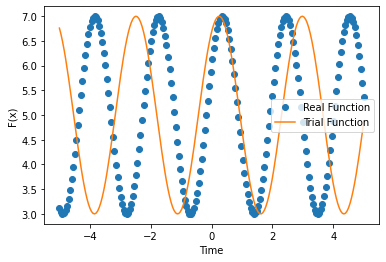

In [2]:
x = np.linspace(-5,5,200)

def RealFunction(x):
    return 2.0*np.sin(3.0*x+np.pi/6)+5.0

#RealF = 2.0*np.sin(x)+0.0

A = 2.0
B = 5.0
C = 2.3
D = 1.0

Firts_Trial = A*np.sin(C*x+D)+B

plt.plot(x,RealFunction(x),'o',label="Real Function")
plt.plot(x,Firts_Trial, label="Trial Function")
plt.xlabel("Time")
plt.legend()
plt.ylabel("F(x)")
plt.show()

def ErrorFunction(x,function_1,function_2):
    Error = 0.0
    for i in range(len(x)):
        Error += np.power(function_1[i]-function_2[i],2)/len(x)
    return Error

[]

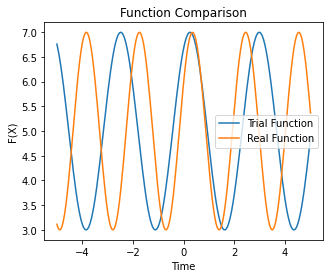

In [3]:
%matplotlib inline
from IPython import display

epochs = 6000

A = 2.0
B = 5.0
C = 2.3
D = 1.0

ErrorVector = []
Avalues = []
Bvalues = []
Cvalues = []
Dvalues = []

def TrialFunction(A,B,C,D,x):
    return A*np.sin(C*x+D)+B

lr = 0.25
##################
plt.ion()
figure, ax = plt.subplots(figsize=(5, 4))
line1, = ax.plot(x, TrialFunction(A,B,C,D,x),label="Trial Function")
line2, = ax.plot(x,RealFunction(x),label="Real Function")
###################

for k in range(epochs):
    grad_A = 0.0
    grad_B = 0.0
    grad_C = 0.0
    grad_D = 0.0
    for j in range(len(x)):
        grad_A = grad_A + 2.0*(RealFunction(j)-TrialFunction(A,B,C,D,j))*np.sin(C*x[j]+D)
        #OTRO FOR PARA DERIVAR CADA FUNCION POR SEPARADO.
        grad_B = grad_B + 2.0*(RealFunction(j)-TrialFunction(A,B,C,D,j))
        grad_C = grad_C + 2.0*(RealFunction(j)-TrialFunction(A,B,C,D,j))*A*np.cos(C*x[j]+D)*x[j]
        grad_D = grad_D + 2.0*(RealFunction(j)-TrialFunction(A,B,C,D,j))*A*np.cos(C*x[j]+D)

    A = A + 1.0*lr*grad_A/len(x)
    B = B + 1.0*lr*grad_B/len(x)
    C = C + 1.0*lr*grad_C/len(x)
    D = D + 1.0*lr*grad_D/len(x)

    #print("A Value = {}".format(A))
    #print("B Value = {}".format(B))
    #print("C Value = {}".format(C))
    #print("D Value = {}".format(D))

    ErrorVector.append(ErrorFunction(x,RealFunction(x),TrialFunction(A,B,C,D,x)))
    Avalues.append(A)
    Bvalues.append(B)
    Cvalues.append(C)
    Dvalues.append(D)

    ########TO PLOT THE INFORMATION: (Continously)

    #line1.set_xdata(x)
    #line1.set_ydata(A*np.sin(C*x+D)+B)
    #line1.set_label("Epoch: {} - Error: {}".format(k,ErrorFunction(x,RealFunction(x),TrialFunction(A,B,C,D,x))))
    #ErrorVector.append(ErrorFunction(x,RealFunction(x),TrialFunction(A,B,C,D,x)))

    #plt.legend()
    #display.display(plt.gcf())
    #display.clear_output(wait=True)
    #figure.canvas.draw()
    #figure.canvas.flush_events()
    #time.sleep(0.1)

#############

NewTrial = A*np.sin(C*x+D)+B
#plt.plot(x,NewTrial,x,RealFunction(x),'o')
plt.title("Function Comparison")
plt.xlabel("Time")
plt.ylabel("F(X)")
plt.legend()
plt.plot()


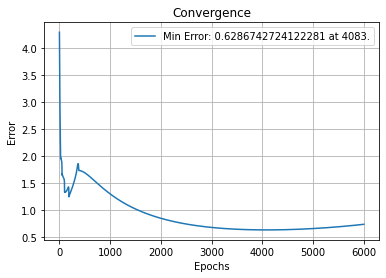

In [4]:
#Error (2000 Iterations ; 0.25 lr) = 0.8439
#Error (4000 Iterations ; 0.25 lr) = 0.7328

numepoch = np.linspace(1,epochs,epochs)

for i in range(len(ErrorVector)):
    if(np.min(ErrorVector) == ErrorVector[i]):
        minError = ErrorVector[i]
        minPosition = i
        bestA = Avalues[i]
        bestB = Bvalues[i]
        bestC = Cvalues[i]
        bestD = Dvalues[i]

plt.plot(numepoch, ErrorVector, label="Min Error: {} at {}.".format(minError,minPosition))
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Convergence")
plt.grid()
plt.legend()
plt.show()

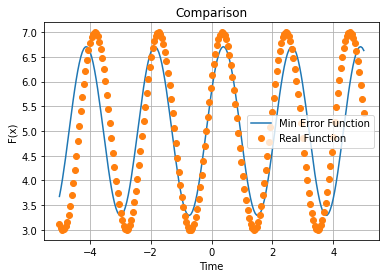

In [5]:
plt.plot(x, TrialFunction(bestA,bestB,bestC,bestD,x), label="Min Error Function")
plt.plot(x,RealFunction(x),'o',label="Real Function")
plt.xlabel("Time")
plt.ylabel("F(x)")
plt.title("Comparison")
plt.grid()
plt.legend()
plt.show()